In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

## K-Means Clustering Implementation in Python for Heart Failure Prediction

### Import des données et lancement de K-Means Clustering sur les données brutes

#### Importation des données

In [159]:
heart_df = pd.read_csv('../heart.csv')
target = heart_df['HeartDisease']
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [160]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


#Évalue la qualité d’un clustering K-Means avec plusieurs métriques internes.
def evaluate_kmeans(X, labels, kmeans):

    metrics = {}

    # Inertie (Within-Cluster Sum of Squares - WCSS)
    #Plus l’inertie est faible, plus les points sont proches de leur centroïde → les clusters sont denses.
    #Interprétation :
    # - Basse inertie = clusters compacts.
    # - Haute inertie = clusters très dispersés → structure floue.
    metrics['inertia'] = kmeans.inertia_

    # Score de silhouette
    #Mesure la cohésion et la séparation des clusters.
    # - Cohésion (points proches du même cluster)
    # - Séparation (points loin des autres clusters)
    metrics['Silhouette Score'] = silhouette_score(X, labels)

    # Indice de Calinski-Harabasz
    #Mesure la dispersion intra-cluster par rapport à la dispersion inter-cluster.
    # Variance inter-cluster → distance entre les centroïdes
    # Variance intra-cluster → dispersion à l’intérieur de chaque cluster
    #Interprétation :
    # - Valeurs élevées = clusters denses et bien séparés.
    # - Valeurs faibles = clusters peu distincts.
    metrics['Calinski–Harabasz Index'] = calinski_harabasz_score(X, labels)

    # Indice de Davies-Bouldin
    #  rapport moyen entre la dispersion intra-cluster et la séparation inter-cluster.
    #Il calcule, pour chaque cluster, à quel point il est “proche” d’un autre cluster.
    metrics['Davies–Bouldin Index'] = davies_bouldin_score(X, labels)

    return metrics

In [161]:
# Fonction pour exécuter K-means pour plusieurs valeurs de k et afficher les scores silhouette
def multipleKMeans(data, k_values, random_state=42):

    scores = {}

    print(" ----- Évaluation du modèle K-Means pour différentes valeurs de k -----")
    print(f"{'k':<5} | {'Inertia':<12} | {'Silhouette':<12} | {'Calinski-H':<15} | {'Davies-Bouldin':<15}")
    print("-" * 70)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(data)

        # Récupération des métriques
        metrics = evaluate_kmeans(data, kmeans.labels_, kmeans)

        # Sauvegarde
        scores[k] = metrics

        # Affichage aligné et arrondi
        print(f"{k:<5} | "
              f"{metrics['inertia']:<12.2f} | "
              f"{metrics['Silhouette Score']:<12.3f} | "
              f"{metrics['Calinski–Harabasz Index']:<15.2f} | "
              f"{metrics['Davies–Bouldin Index']:<15.3f}")

    print("-" * 70)
    return scores

In [162]:
def elbow_method(data, k_range, random_state=42, show=True):

    inertias = {}

    print("\n Calcul de l'inertie pour différentes valeurs de k\n")
    print(f"{'k':<5} | {'Inertia':<12}")
    print("-" * 20)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(data)
        inertias[k] = kmeans.inertia_
        print(f"{k:<5} | {kmeans.inertia_:<12.2f}")

    print("-" * 20)

    # Affichage du graphique du coude
    if show:
        plt.figure(figsize=(7, 5))
        plt.plot(list(inertias.keys()), list(inertias.values()), 'o-', color='royalblue')
        plt.title("Méthode du coude")
        plt.xlabel("Nombre de clusters (k)")
        plt.ylabel("Inertie intra-cluster (WCSS)")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    return inertias

#### Lancement des K-mans Clustering sur les données brutes

In [163]:
#encodage des variables catégorielles car K-means ne gère pas les variables catégorielles
#on enleve la colonne HeartDisease pour le clustering
brut_heart_df_encoded = pd.get_dummies(heart_df, drop_first=True).drop("HeartDisease", axis=1)

xBrut = brut_heart_df_encoded.values
brut_heart_df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [164]:
k = 2
rndState = 42
kmeans = KMeans(n_clusters=k, random_state=rndState)
kmeans.fit(xBrut)
brut_heart_df_encoded ['Cluster'] = kmeans.labels_


In [165]:
from sklearn.metrics import silhouette_score

scoreTrue = silhouette_score(xBrut, kmeans.labels_)
print(f"Score silhouette (drop_first=True)  : {scoreTrue:.3f}")

Score silhouette (drop_first=True)  : 0.693


In [166]:
#tentative avec plusieurs valeurs de k
klist = range(2, 11)
scoresLTrue = multipleKMeans(xBrut, klist)

 ----- Évaluation du modèle K-Means pour différentes valeurs de k -----
k     | Inertia      | Silhouette   | Calinski-H      | Davies-Bouldin 
----------------------------------------------------------------------
2     | 3491467.62   | 0.693        | 2223.03         | 0.369          
3     | 2054456.45   | 0.465        | 2206.95         | 0.747          
4     | 1598859.50   | 0.421        | 1975.27         | 0.834          
5     | 1341963.47   | 0.362        | 1806.82         | 0.947          
6     | 1172459.23   | 0.362        | 1678.98         | 0.945          
7     | 1063798.53   | 0.341        | 1555.89         | 1.025          
8     | 972142.78    | 0.341        | 1470.01         | 1.007          
9     | 888731.98    | 0.345        | 1416.09         | 0.972          
10    | 846886.39    | 0.327        | 1324.48         | 1.069          
----------------------------------------------------------------------



 Calcul de l'inertie pour différentes valeurs de k

k     | Inertia     
--------------------
2     | 3491467.62  
3     | 2054456.45  
4     | 1598859.50  
5     | 1341963.47  
6     | 1172459.23  
7     | 1063798.53  
8     | 972142.78   
9     | 888731.98   
10    | 846886.39   
--------------------


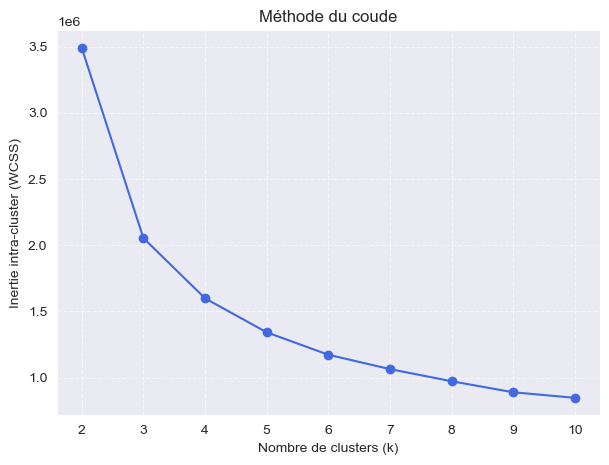

In [167]:
inert = elbow_method(xBrut, klist)

en croisant les différents métriques et en les interprétant on obtient les résultats suivants :

| Métrique              | Tendance observée                                 | Indication sur k  |
| --------------------- | ------------------------------------------------- | ----------------- |
| **Inertia**           | Diminution marquée jusqu’à k≈4 puis stabilisation | k = 3–4 plausible |
| **Silhouette**        | Maximal à k=2, baisse forte ensuite               | k = 2 optimal     |
| **Calinski–Harabasz** | Maximal à k=2–3, décroît ensuite                  | k = 2–3 optimal   |
| **Davies–Bouldin**    | Minimal à k=2, augmente ensuite                   | k = 2 optimal     |

on retrouve donc bien k=2 comme valeur optimale pour le clustering sur les données brutes encodées avec drop_first=True. toutes les métriques montre une tendance claire vers k=2, sauf pour l'inertie qui suggère k=3 ou 4. Cependant, l'inertie sur le graphique connait une diminution marquée entre 2 et 3 Clusters, le coude ce situe entre 3 et 4 mais les autres métriques penchent clairement pour k=2. Nous allons donc retenir k=2 pour la suite.


In [168]:
# Réduction de dimensionnalité avec PCA pour visualisation en 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(brut_heart_df_encoded.drop("Cluster", axis=1))

# on transforme de nouveau en DataFrame pour faciliter la manipulation et on rajoute les labels de clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = brut_heart_df_encoded['Cluster']

#rajout de la colonne HeartDisease pour comparaison
df_pca['HeartDisease'] = heart_df['HeartDisease']
df_pca

,PC1,PC2,Cluster,HeartDisease
0,92.311315,29.445651,1,0
1,-17.143665,13.736029,1,1
2,81.906717,-38.223511,1,0
3,13.654574,-28.745909,1,1
4,-4.348523,-18.094899,1,0
...,...,...,...,...
913,64.490453,-1.444165,1,1
914,-5.472467,-0.830304,1,1
915,-69.003773,-17.334602,1,1
916,39.206761,33.591950,1,1


In [169]:
# Visualisation des clusters pour drop_first=True
fig = px.scatter(
    df_pca,
    x="PC1", y="PC2",
    color=df_pca["Cluster"].astype(str),
    title="Visualisation des clusters K-Means en 2D (PCA)",
    template="plotly_dark",
    hover_data=["HeartDisease"],  # Affiché au survol
    symbol=['circle' if hd == 0 else 'x' for hd in df_pca['HeartDisease']],
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    height=900,
    width=1300,
    title_font_size=20
)
fig.show()

Les deux couleurs représentent les clusters trouvés par K-means, tandis que les symboles (cercles ou losange) représentent la présence ou non de maladie cardiaque (HeartDisease = 0 ou 1).
- si maladie cardiaque (HeartDisease = 1) : losange
- si pas de maladie cardiaque (HeartDisease = 0) : cercle

On peut observer que les clusters ne correspondent pas parfaitement aux classes de maladie cardiaque, mais il y a une séparation net entre les deux cluster.

Nous allons désormais procéder à dans un premier temps une analyse des données et de ce qui se trouve dans notre dataset, ainsi nous pourrons réaliser du pré-traitement ainsi qu'une normalisation des données avant de relancer K-means clustering. Nous pourrons ainsi comparer les résultats obtenus avant et après pré-traitement des données.

### Analyse et traitement des données

In [170]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [171]:
#Vérification des types de données
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Chaque variable corréspond à :

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


On observe que certaines variables sont catégorielles :
- ChestPainType : ATA | NAP | ASY | TA
- Sex : F | M
- RestingECG : Normal | ST | LVH
- ExerciseAngina : N | Y

Comme nous l'avons donc fait précédement, nous devrons donc encoder ces variables catégorielles avant de lancer K-means clustering (ici nous utiliserons un encodage one-hot avec drop_first=True pour éviter la multicolinéarité).

nous allons donc désormais procéder à la vérification des valeurs manquantes et des valeurs aberrantes.


##### valeur manquantes et aberrantes

In [172]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

On observe qu'il n'y a pas de valeurs manquantes dans notre dataset. Pour ce qui est des valeurs aberrantes, nous allons visualiser les boxplots des variables quantitatives pour les détecter dans un premier temps.

In [173]:
# on récupère les colonnes quantitatives
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
#on ne prends pas FastingBS car c'est une variable binaire (0 ou 1)

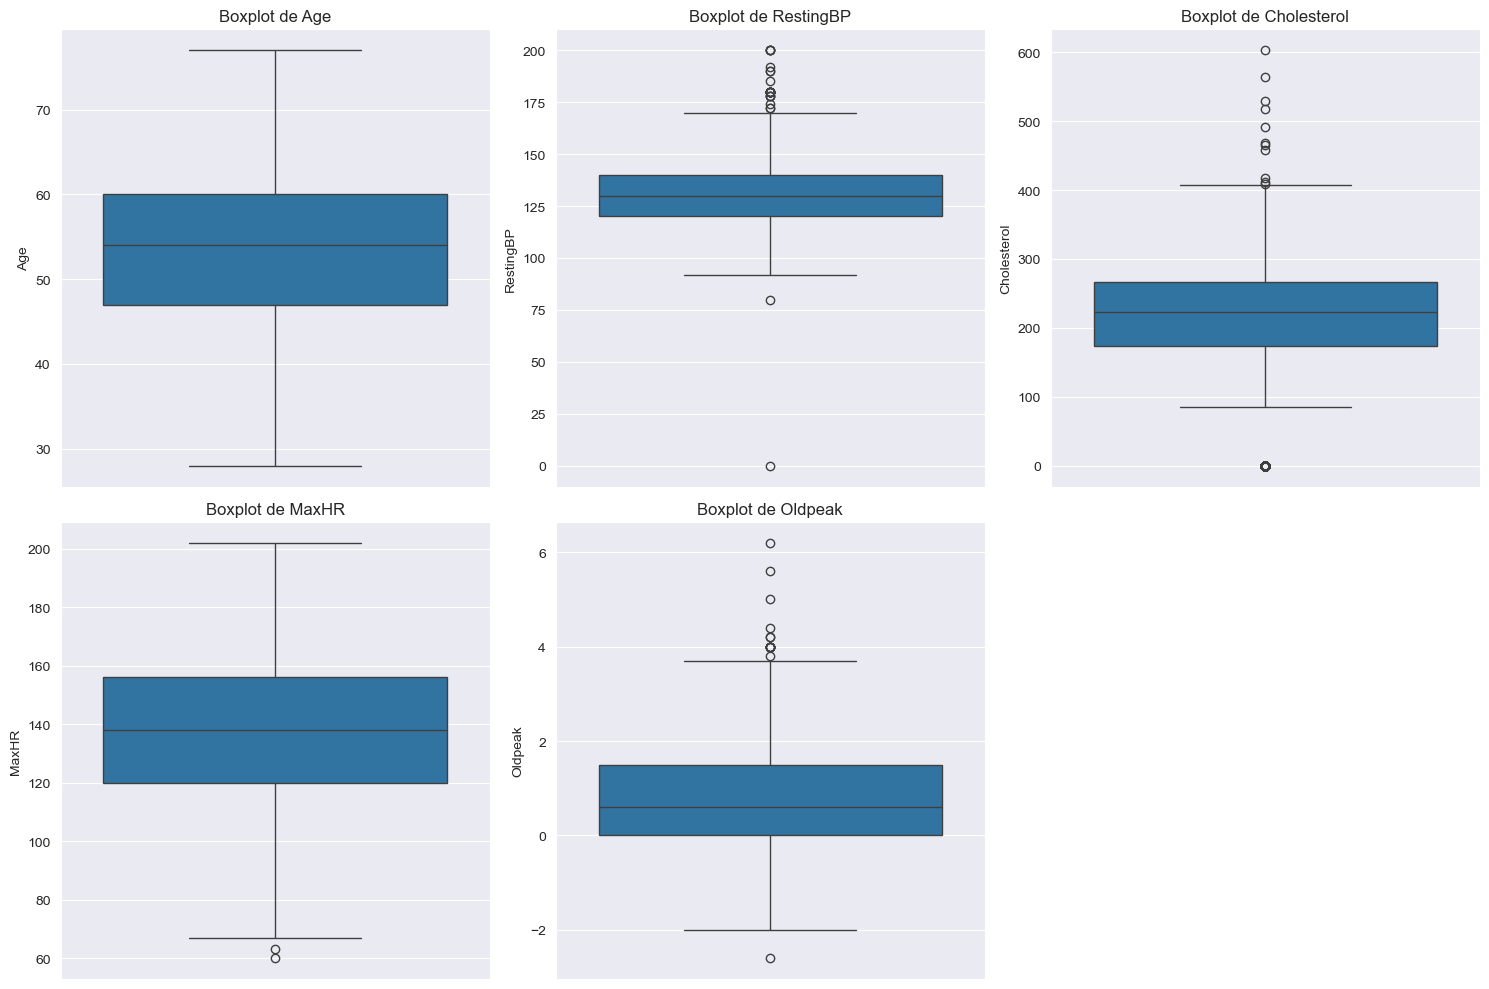

In [174]:
# Visualisation des boxplots pour détecter les valeurs aberrantes
plt.figure(figsize=(15, 10))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=heart_df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Remarque : on peut déjà observer que certaines variables comme cholesterol et restingBP ont des valeurs aberrantes (ex : restingBP = 0). On va donc rajouter une représentation affichant la distribution des données pour chaque variable quantitative afin de mieux visualiser les valeurs aberrantes.


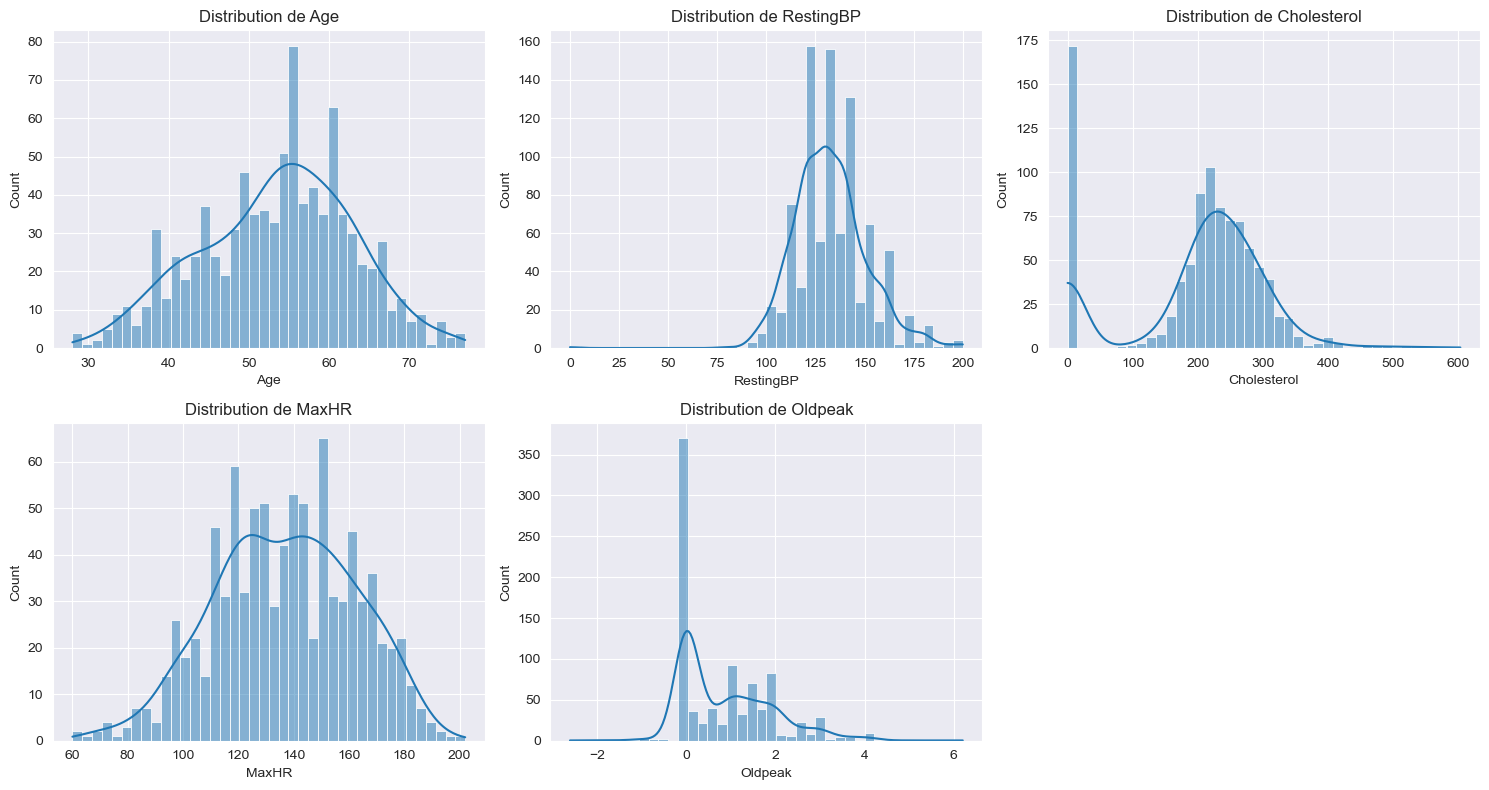

In [175]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    # Utilisez un histogramme combiné à un KDE plot (courbe de densité)
    sns.histplot(heart_df[col], kde=True, bins=40)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

afin de nettoyer les données des valeurs aberrantes, nous allons implémenter un algo de suppression des lignes ou les valeurs sont aberrantes. Nous allons pour ça implémenter la méthode IQR (Interquartile Range) pour détecter et supprimer les valeurs aberrantes dans les variables quantitatives. Pour un peu plus de diversité nous allons également implémenter une méthode de suppression avec une isolation forest.

###### Nettoyage des données des valeurs à 0 dans les variables quantitatives

In [176]:
#on commence par supprimer les lignes ou les valeurs de Cholesterol et RestingBP sont à 0 car médicalement parlant ce n'est pas possible
#on va supprimer les lignes où RestingBP = 0 et ou Cholesterol = 0
print(f"Nombre de lignes avant la suppression : {len(heart_df)}")
print(f"Nombre de RestingBP = 0 : {(heart_df['RestingBP'] == 0).sum()}")
print(f"Nombre de Cholesterol = 0 : {(heart_df['Cholesterol'] == 0).sum()}")

heart_df = heart_df[(heart_df['RestingBP'] != 0)]
heart_df_cleaned = heart_df[heart_df['Cholesterol'] != 0]
print(f"Nombre de lignes après la suppression : {len(heart_df_cleaned)}")

Nombre de lignes avant la suppression : 918
Nombre de RestingBP = 0 : 1
Nombre de Cholesterol = 0 : 172
Nombre de lignes après la suppression : 746


In [177]:
heart_df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


###### IQR METHODE

In [178]:
# def iqr_remove(df, cols=None, coeff=1.5):
#
#     if cols is None:
#         cols = df.select_dtypes(include=["float64", "int64"]).columns
#
#     # copie du DataFrame pour éviter de modifier l'original
#     df_filtered = df.copy()
#     initial_len = len(df_filtered)
#
#     # pour chaque colonne, on calcule les bornes inférieures et supérieures
#     for col in cols:
#         Q1 = df_filtered[col].quantile(0.25)
#         Q3 = df_filtered[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - coeff * IQR
#         upper = Q3 + coeff * IQR
#
#         # on filtre les lignes en dehors des bornes
#         df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]
#         print(f" {col} : {initial_len - len(df_filtered)} lignes supprimées")
#
#     print(f" taille finale du DataFrame : {len(df_filtered)} lignes\n")
#
#     return df_filtered

###### Isolation Forest Methode

In [179]:
from sklearn.ensemble import IsolationForest
def detect_outliers_isoforest(df, col_list, contamination="auto", random_state=42):

    df_num = df[col_list]

    # Initialiser et entraîner le modèle Isolation Forest
    clf = IsolationForest(contamination=contamination, random_state=random_state)
    predictions = clf.fit_predict(df_num)

    # Ajouter la colonne 'outlier' au DataFrame original
    df_copy = df.copy()
    df_copy['outlier'] = predictions

    # on extrait les outliers dans un nouveau DataFrame
    outliers_df = df_copy[df_copy['outlier'] == -1].copy().drop(columns=['outlier'])

    nb_total = len(df_copy)
    nb_outliers = len(outliers_df)
    nb_cleaned = nb_total - nb_outliers

    print("Résumé de la détection d’outliers (Isolation Forest) :")
    print(f" - Nombre total de points : {len(df_copy)}")
    print(f" - Nombre d'outliers détectés : {len(outliers_df)}")
    print(f" - Proportion d'outliers : {len(outliers_df) / len(df_copy):.2%}")
    print(f" - Nombre de lignes après suppression des outliers : {nb_cleaned}")

    return outliers_df

###### Application de la méthode de netoyage choisie

In [180]:
# METHODE IQR

# #on va filtrer les valeurs aberrantes
# heart_df_cleaned = iqr_remove(heart_df_cleaned, cols=quantitative_cols, coeff=1.5)

# METHODE ISOLATION FOREST
outliers = detect_outliers_isoforest(heart_df_cleaned, quantitative_cols)
#on supprime les outliers du DataFrame
heart_df_cleaned = heart_df_cleaned.drop(outliers.index)


Résumé de la détection d’outliers (Isolation Forest) :
 - Nombre total de points : 746
 - Nombre d'outliers détectés : 118
 - Proportion d'outliers : 15.82%
 - Nombre de lignes après suppression des outliers : 628


###### Affichage des résultats après nettoyage

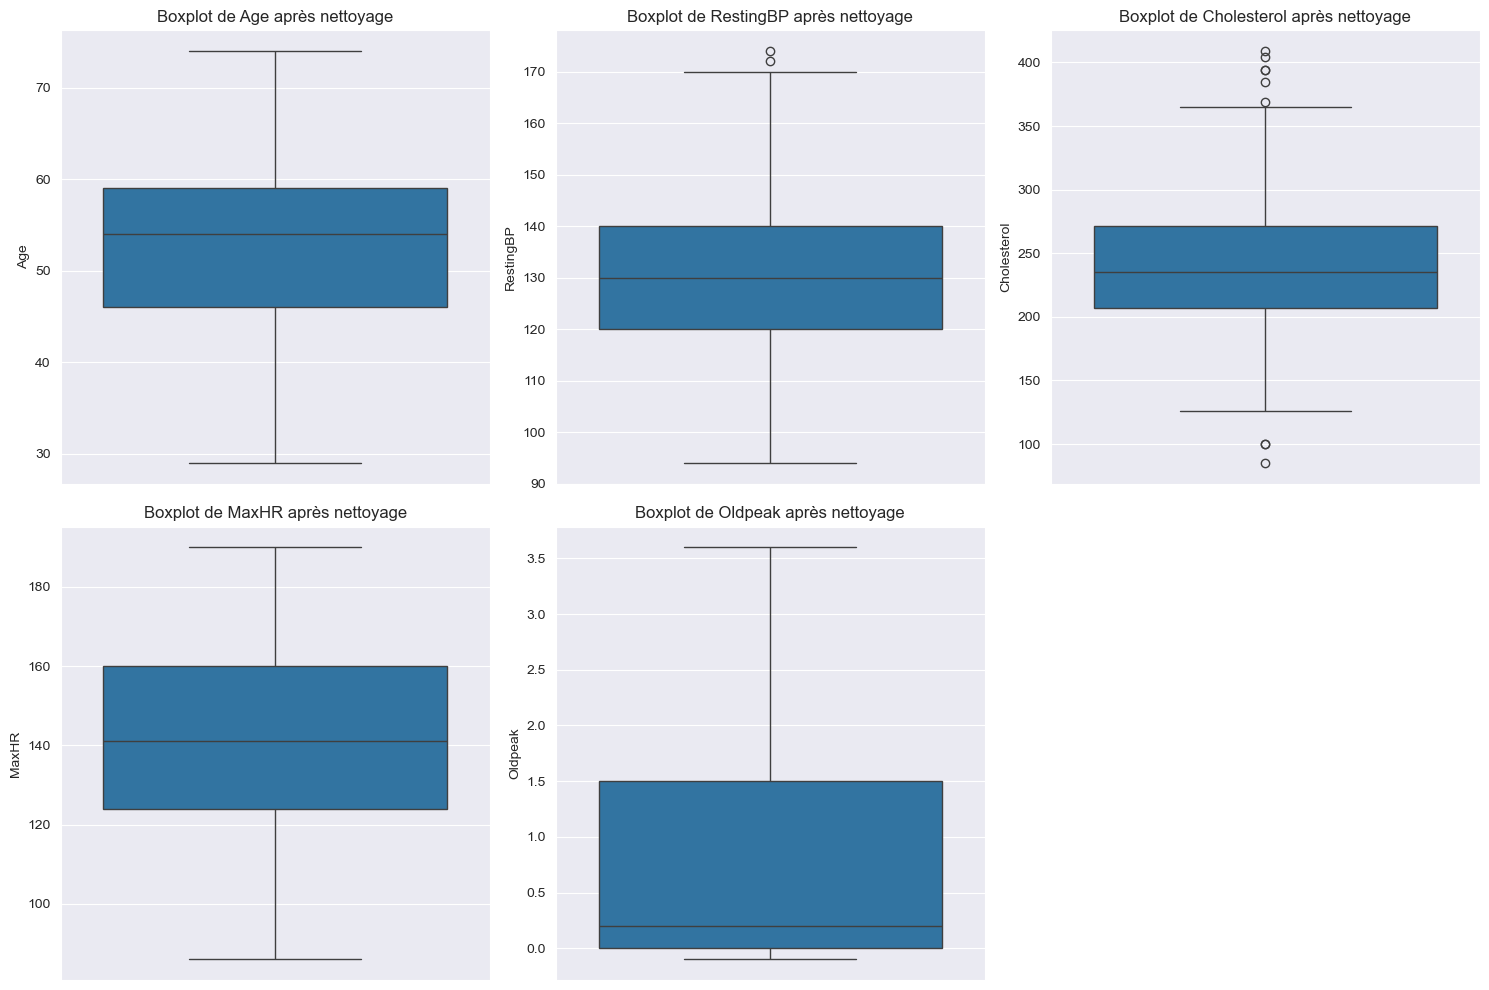

In [181]:
#nouvelle visualisation des boxplots après nettoyage
plt.figure(figsize=(15, 10))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=heart_df_cleaned[col])
    plt.title(f'Boxplot de {col} après nettoyage')
plt.tight_layout()

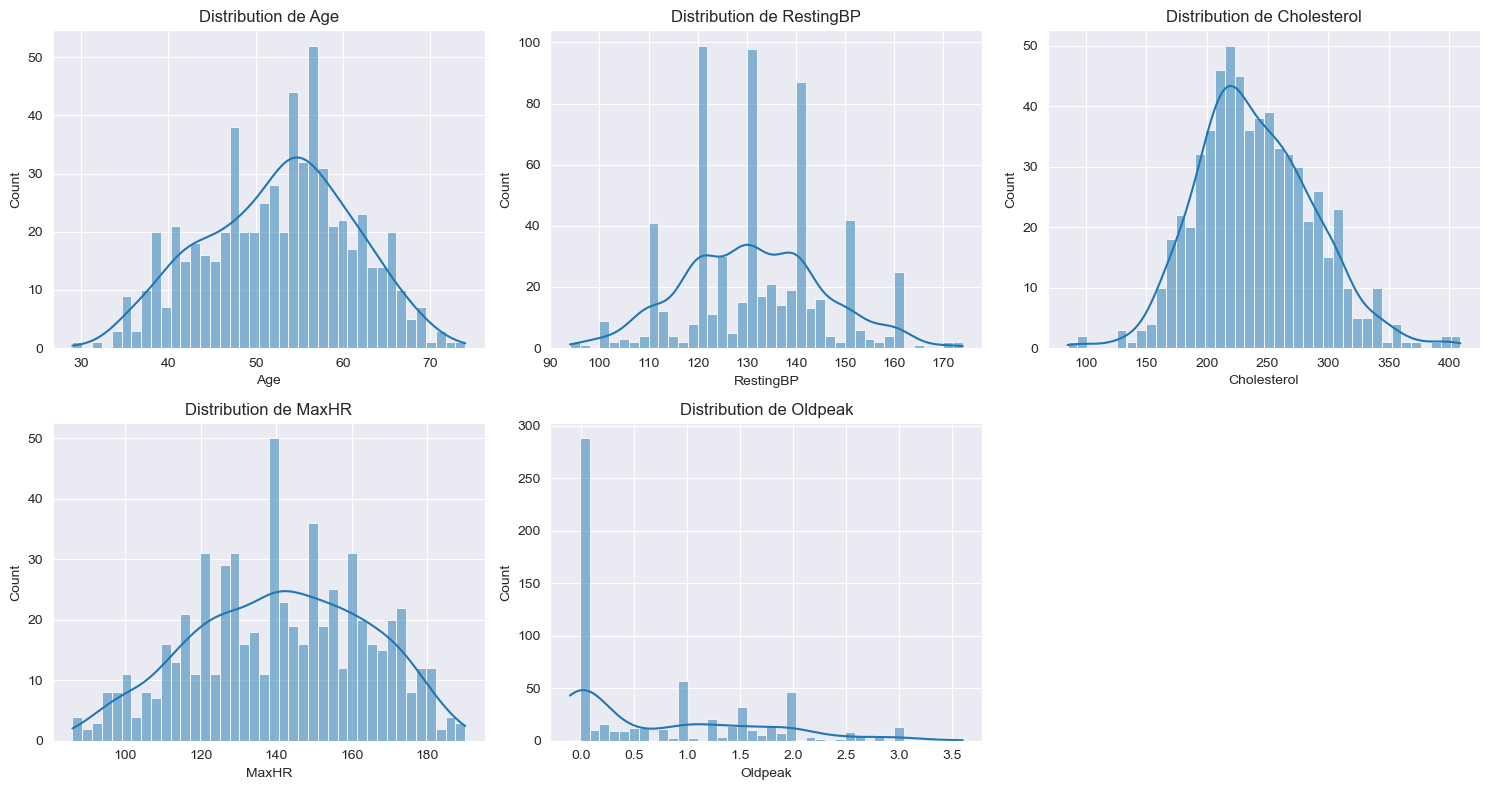

In [182]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(heart_df_cleaned[col], kde=True, bins=40)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

une fois les données nétoyées des valeurs aberrantes nous pouvons réaliser une visualisation des variables quantitatives avec le fait que oui ou non le patient a une maladie cardiaque (HeartDisease = 1 ou 0)

In [183]:
df_quantitative = heart_df_cleaned[quantitative_cols]

In [184]:
#on va réaliser une PCA en deux dimensions pour visualiser les variables quantitatives en fonction de la présence ou non de maladie cardiaque
pca_quant = PCA(n_components=2, random_state=42)
X_pca_quant = pca_quant.fit_transform(df_quantitative)

# on transforme de nouveau en DataFrame pour faciliter la manipulation et on rajoute les labels de HeartDisease
df_pca_quant = pd.DataFrame(X_pca_quant, columns=['PC1', 'PC2'])
df_pca_quant['HeartDisease'] = heart_df_cleaned['HeartDisease'].reset_index(drop=True)

In [185]:
# Visualisation des variables quantitatives en fonction de la présence ou non de maladie cardiaque
fig = px.scatter(
    df_pca_quant,
    x="PC1", y="PC2",
    color=df_pca_quant["HeartDisease"].astype(str),
    title="Visualisation des variables quantitatives en 2D (PCA) selon la présence de maladie cardiaque",
    template="plotly_dark",
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    height=900,
    width=1300,
    title_font_size=20
)
fig.show()

Maintenant que les valeurs aberrantes et manquantes ont été traitées nous allons recréer un dataset avec celles ci et les variables catégorielles encodées pour relancer K-means clustering et comparer les résultats obtenus avec ceux obtenus précédemment sur les données brutes.

In [186]:
# Encodage des variables catégorielles avec get_dummies (drop_first=True)
heart_df_cleaned_encoded = pd.get_dummies(heart_df_cleaned, drop_first=True)
target_cleaned = heart_df_cleaned_encoded['HeartDisease']

heart_df_cleaned_encoded = heart_df_cleaned_encoded.drop("HeartDisease", axis=1)
heart_df_cleaned_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,123,0.2,False,False,False,False,True,False,True,True,False
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [187]:
#on lance plusieurs K-means clustering avec différentes valeurs de k pour avoir le meilleur score silhouette
x_cleaned = heart_df_cleaned_encoded.values
res = multipleKMeans(x_cleaned, klist)

 ----- Évaluation du modèle K-Means pour différentes valeurs de k -----
k     | Inertia      | Silhouette   | Calinski-H      | Davies-Bouldin 
----------------------------------------------------------------------
2     | 1019738.99   | 0.391        | 570.87          | 0.953          
3     | 796772.48    | 0.277        | 452.18          | 1.155          
4     | 668561.32    | 0.270        | 398.58          | 1.157          
5     | 566914.02    | 0.261        | 379.89          | 1.128          
6     | 495775.48    | 0.274        | 364.81          | 1.090          
7     | 444079.08    | 0.263        | 350.90          | 1.101          
8     | 414901.92    | 0.244        | 327.64          | 1.170          
9     | 386390.37    | 0.234        | 313.05          | 1.183          
10    | 367648.86    | 0.216        | 295.48          | 1.196          
----------------------------------------------------------------------



 Calcul de l'inertie pour différentes valeurs de k

k     | Inertia     
--------------------
2     | 1019738.99  
3     | 796772.48   
4     | 668561.32   
5     | 566914.02   
6     | 495775.48   
7     | 444079.08   
8     | 414901.92   
9     | 386390.37   
10    | 367648.86   
--------------------


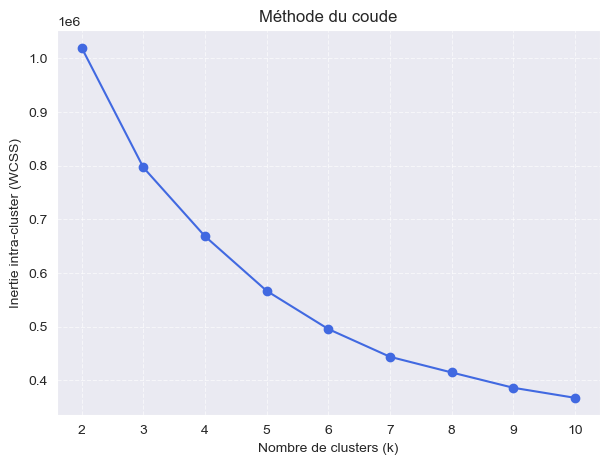

In [188]:
elobw_clean = elbow_method(x_cleaned, klist)

en croisant les différents métriques et en les interprétant on obtient les résultats suivants :

| Métrique              | Interprétation                       | Valeur optimale              | Indication     |
| --------------------- |--------------------------------------| ---------------------------- | -------------- |
| **Inertia**           | cohésion interne (basse = bon)       | Diminution forte jusqu’à k=4 | Coude vers 3–4 |
| **Silhouette**        | Cohésion & séparation (haut = bon)   | Max à **k=2**                | 2              |
| **Calinski–Harabasz** | Variance inter/intra (haut = bon)    | Max à **k=2**                | 2              |
| **Davies–Bouldin**    | Dispersion inter-cluster (bas = bon) | Min à **k=2**                | 2              |



Le meilleur nombre de clusters reste k = 2 après nettoyage des outliers.
Ce résultat est cohérent avec la structure binaire naturelle du dataset (patients malades vs non malades).
Le nettoyage a légèrement réduit la métrique Silhouette, elle est passé de ~0.69 avant nettoyage à 0.39. Le nettoyage à certainement réduit la séparation artificielle créée par les outliers

In [189]:
kmeanCleared = KMeans(n_clusters=2, random_state=42)
kmeanCleared.fit(x_cleaned)
heart_df_cleaned_encoded['Cluster'] = kmeanCleared.labels_


In [190]:
# Réduction de dimensionnalité avec PCA pour visualisation en 2D
pca_cleaned = PCA(n_components=2, random_state=42)
X_pca_cleaned = pca_cleaned.fit_transform(heart_df_cleaned_encoded.drop("Cluster", axis=1))

# on transforme de nouveau en DataFrame pour faciliter la manipulation et on rajoute les labels de clusters
df_pca_cleaned = pd.DataFrame(X_pca_cleaned, columns=['PC1', 'PC2'])
#on rajoute les labels de clusters et HeartDisease
df_pca_cleaned['Cluster'] = heart_df_cleaned_encoded['Cluster'].reset_index(drop=True)
df_pca_cleaned['HeartDisease'] = target_cleaned.reset_index(drop=True)
df_pca_cleaned

,PC1,PC2,Cluster,HeartDisease
0,48.892611,31.519005,0,0
1,-59.660289,12.171902,1,1
2,42.465181,-39.735847,0,0
3,-26.149412,-32.534560,1,1
4,-44.817758,-20.909682,1,0
...,...,...,...,...
623,1.092058,-19.298604,1,1
624,23.449773,-5.494633,0,1
625,-109.041822,-26.291509,1,1
626,-3.891260,31.878540,1,1


In [191]:
# Visualisation des clusters pour les données nettoyées en 2D
fig = px.scatter(
    df_pca_cleaned,
    x="PC1", y="PC2",
    color=df_pca_cleaned["Cluster"].astype(str),
    title="Visualisation des clusters K-Means en 2D (PCA) après nettoyage",
    template="plotly_dark",  # Thème sombre
    hover_data=["HeartDisease"],
    symbol=['circle' if hd == 0 else 'x' for hd in df_pca_cleaned['HeartDisease']],
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.update_layout(
    height=900,
    width=1300,
    title_font_size=20
)
fig.show()

### Normalisation des données quantitatives et relance de K-means clustering

afin d'améliorer les résultats de k-means clustering, nous allons normalmiser les variables quantitatives avant de relancer un clustering. Kmeans est en effet une méthode qui se base sur les distances euclidiennes afin de construire des cluster, par conséquant les variables quantitatives avec des échelles différentes peuvent biaiser les résultats. Nous allons donc utiliser un StandardScaler pour normaliser les variables quantitatives avant de relancer K-means clustering.

In [192]:
#on va d'abord repartir des données nettoyées avant encodage
heart_df_scal = heart_df_cleaned.copy()
target_scal = heart_df_scal['HeartDisease']
heart_df_scal.drop("HeartDisease", axis=1, inplace=True)

heart_df_scal

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [193]:
# Normalisation des variables quantitatives avec StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
heart_df_scal[quantitative_cols] = scaler.fit_transform(heart_df_scal[quantitative_cols])
heart_df_scal

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.496992,M,ATA,0.619121,1.019509,0,Normal,1.351347,N,-0.840498,Up
1,-0.430838,F,NAP,2.028101,-1.251330,0,Normal,0.653196,N,0.286868,Flat
2,-1.852376,M,ATA,-0.085369,0.894508,0,ST,-1.877600,N,-0.840498,Up
3,-0.549299,F,ASY,0.478223,-0.542995,0,Normal,-1.441256,Y,0.850551,Flat
4,0.161470,M,NAP,1.323611,-0.938829,0,Normal,-0.830374,N,-0.840498,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,0.516854,F,ASY,0.619121,0.019506,0,Normal,-0.786740,Y,-0.615024,Flat
913,-0.904684,M,TA,-1.494349,0.498674,0,Normal,-0.394030,N,0.512341,Flat
915,0.516854,M,ASY,-0.085369,-2.272165,0,Normal,-1.135815,Y,0.512341,Flat
916,0.516854,F,ATA,-0.085369,-0.084660,0,LVH,1.438616,N,-0.840498,Flat


In [194]:
# Encodage des variables catégorielles
heart_df_scal_encoded = pd.get_dummies(heart_df_scal, drop_first=True)
heart_df_scal_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.496992,0.619121,1.019509,0,1.351347,-0.840498,True,True,False,False,True,False,False,False,True
1,-0.430838,2.028101,-1.251330,0,0.653196,0.286868,False,False,True,False,True,False,False,True,False
2,-1.852376,-0.085369,0.894508,0,-1.877600,-0.840498,True,True,False,False,False,True,False,False,True
3,-0.549299,0.478223,-0.542995,0,-1.441256,0.850551,False,False,False,False,True,False,True,True,False
4,0.161470,1.323611,-0.938829,0,-0.830374,-0.840498,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.516854,0.619121,0.019506,0,-0.786740,-0.615024,False,False,False,False,True,False,True,True,False
913,-0.904684,-1.494349,0.498674,0,-0.394030,0.512341,True,False,False,True,True,False,False,True,False
915,0.516854,-0.085369,-2.272165,0,-1.135815,0.512341,True,False,False,False,True,False,True,True,False
916,0.516854,-0.085369,-0.084660,0,1.438616,-0.840498,False,True,False,False,False,False,False,True,False


In [195]:
# Lancement de K-means clustering sur les données normalisées
x_scal = heart_df_scal_encoded.values
res_scal = multipleKMeans(x_scal, klist)

 ----- Évaluation du modèle K-Means pour différentes valeurs de k -----
k     | Inertia      | Silhouette   | Calinski-H      | Davies-Bouldin 
----------------------------------------------------------------------
2     | 3372.84      | 0.197        | 170.82          | 1.863          
3     | 3099.66      | 0.138        | 120.33          | 2.198          
4     | 2848.56      | 0.137        | 105.49          | 1.976          
5     | 2706.47      | 0.121        | 91.31           | 2.100          
6     | 2566.91      | 0.121        | 83.66           | 1.982          
7     | 2436.22      | 0.123        | 78.89           | 1.932          
8     | 2376.11      | 0.112        | 71.46           | 2.006          
9     | 2294.09      | 0.112        | 67.43           | 1.957          
10    | 2208.59      | 0.113        | 64.81           | 1.937          
----------------------------------------------------------------------



 Calcul de l'inertie pour différentes valeurs de k

k     | Inertia     
--------------------
2     | 3372.84     
3     | 3099.66     
4     | 2848.56     
5     | 2706.47     
6     | 2566.91     
7     | 2436.22     
8     | 2376.11     
9     | 2294.09     
10    | 2208.59     
--------------------


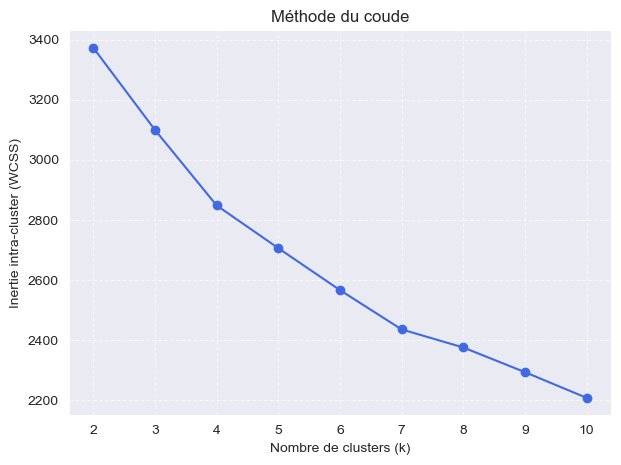

In [196]:
elboRes_scal = elbow_method(x_scal, klist)

On croise les différents métriques et on obtient les résultats suivants :

| **Métrique**          | **Interprétation**                                                                                                                                                                 | **Valeur optimale observée**                             | **Indication (k optimal)** |
| --------------------- |------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------| -------------------------------------------------------- | --------------------- |
| **Inertia**           | Mesure la cohésion interne des clusters : plus elle est faible, plus les points sont proches du centre de leur groupe. La diminution devient minime après un certain k (méthode du coude). | Diminution forte jusqu’à **k = 3–4**, puis stabilisation |  Coude vers **3–4**   |
| **Silhouette**        | Évalue à la fois la cohésion des points d’un même cluster** et la séparation entre les clusters.                                                                                   | Maximum à **k = 2 (0.233)**                              |  **2**                |
| **Calinski–Harabasz** | Compare la dispersion entre les clusters** à la dispersion à l’intérieur des clusters**. Des valeurs élevées traduisent des groupes bien séparés.                                  | Maximum à **k = 2 (194.74)**                             |  **2**                |
| **Davies–Bouldin**    | Mesure la similarité moyenne entre clusters** : plus la valeur est faible, plus les groupes sont distincts.                                                                        | Minimum à **k = 2 (1.646)**                              |  **2**                |

La faible valeur du Silhouette Score (< 0.25) montre que la séparation entre les individus reste partielle même après normalisation.
Les deux groupes se chevauchent encore significativement, indiquant que les variables disponibles n’expliquent pas parfaitement la distinction entre les deux groupes. Cela peut indiquer qu'il faudrait réaliser une sélection de variables plus discriminantes, ou de se tourner vers une autre méthode de clustering non linéaire (par ex. DBSCAN ou GMM). On va tout de même suivre ce résultat et retenir k=2 pour la suite.






In [197]:
kmeanScal = KMeans(n_clusters=2, random_state=42)
kmeanScal.fit(x_scal)
heart_df_scal_encoded['Cluster'] = kmeanScal.labels_

#calcul de la PCA pour visualisation
pca_scal = PCA(n_components=2, random_state=42)
X_pca_scal = pca_scal.fit_transform(heart_df_scal_encoded.drop("Cluster", axis=1))

In [198]:
# on transforme de nouveau en DataFrame pour faciliter la manipulation et on rajoute les labels de clusters
df_pca_scal = pd.DataFrame(X_pca_scal, columns=['PC1', 'PC2'])
df_pca_scal['Cluster'] = heart_df_scal_encoded['Cluster'].reset_index(drop=True)
df_pca_scal['HeartDisease'] = target_scal.reset_index(drop=True)
df_pca_scal

,PC1,PC2,Cluster,HeartDisease
0,-1.917050,1.486308,1,0
1,0.122676,-0.365045,1,1
2,-0.640396,0.142310,1,0
3,1.246430,-0.991791,0,1
4,-0.009065,-0.509332,1,0
...,...,...,...,...
623,0.799739,0.030140,0,1
624,-0.202946,-0.433115,1,1
625,1.144106,-2.492127,0,1
626,-0.835206,0.561319,1,1


In [199]:
# Visualisation des clusters pour les données normalisées en 2D
fig = px.scatter(
    df_pca_scal,
    x="PC1", y="PC2",
    color=df_pca_scal["Cluster"].astype(str),
    title="Visualisation des clusters K-Means en 2D (PCA) après normalisation",
    template="plotly_dark",  # Thème sombre
    hover_data=["HeartDisease"],
    symbol=['circle' if hd == 0 else 'x' for hd in df_pca_scal['HeartDisease']],
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.update_layout(
    height=900,
    width=1300,
    title_font_size=20
)
fig.show()

### Séléction de variables avant K-means clustering en fonction de la corrélation avec la variable cible

In [200]:
#on repart des données nettoyées sans encodage et sans normalisation
heart_df_Select = heart_df_cleaned.copy()
target_select = heart_df_Select['HeartDisease']

heart_df_Select

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [201]:
# Colonne avec valeur continues
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

#### Calcul de la corrélation entre les variables quantitatives et la variable cible

In [202]:
def corr_Quantitive_Col(df, quant_cols, target, threshold=0.2, method='spearman'):
    #le paramètre method peut prendre plusieurs valeurs : 'pearson', 'spearman', 'kendall'

    # Calcul des corrélations
    corr_df = df[quant_cols].corrwith(target, method=method).sort_values(ascending=False)

    # Filtrage des variables fortement corrélées
    selected_features = corr_df[abs(corr_df) > threshold].index.tolist()

    # Affichage des corrélations
    print("Corrélation des variables quantitatives avec la target :")
    print(corr_df)
    print(f"Les Variables au dessus du seuil {threshold} sont : {selected_features}")

    # Visualisation optionnelle
    plt.figure(figsize=(8, 5))
    sns.barplot(x=corr_df.values, y=corr_df.index, hue=corr_df.index, palette='crest', dodge=False, legend=False)
    plt.title(f"Corrélation ({method.capitalize()}) avec {target.name}")
    plt.xlabel("Coefficient de corrélation")
    plt.ylabel("Variables")
    plt.show()

    return corr_df, selected_features

Corrélation des variables quantitatives avec la target :
Oldpeak        0.479359
Age            0.298293
RestingBP      0.140527
Cholesterol    0.095250
MaxHR         -0.376866
dtype: float64
Les Variables au dessus du seuil 0.3 sont : ['Oldpeak', 'MaxHR']


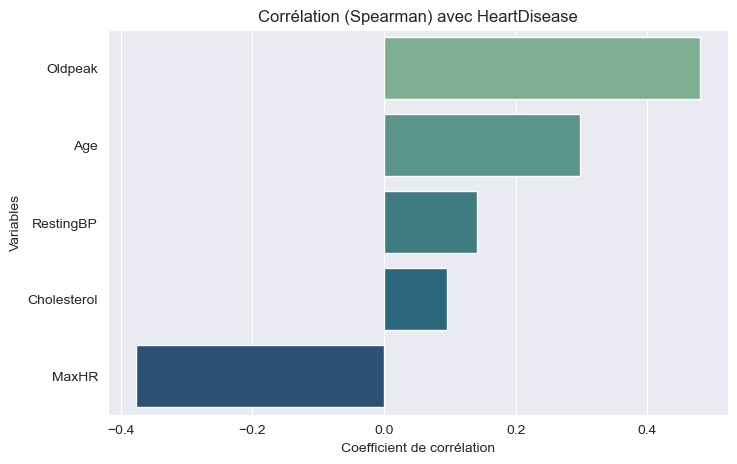

In [203]:
res1, res2 = corr_Quantitive_Col(heart_df_Select, quantitative_cols, target_select, threshold=0.3, method='spearman')

#### Calcul de la corrélation entre les variables catégorielles et la variable cible

In [204]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import chi2

def corr_Categorie_Col(df, catego_col ,target, p_threshold=0.05):

    # Encodage numérique temporaire (nécessaire pour le test du Chi²)
    encoded_df = df.copy()
    le = LabelEncoder()

    for col in catego_col:
        encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

    # Normalisation : le test du Chi² requiert des valeurs non négatives
    X_cat = MinMaxScaler().fit_transform(encoded_df[catego_col])

    # Application du test du Chi²
    chi_scores, p_values = chi2(X_cat, target)

    # Construction du DataFrame de résultats
    chi2_results = pd.DataFrame({
        'Variable': catego_col,
        'Chi²': chi_scores,
        'p-value': p_values
    }).sort_values(by='Chi²', ascending=False)

    # Sélection des variables significatives
    selected_features = chi2_results[chi2_results['p-value'] < p_threshold]['Variable'].tolist()

    print("Résultats du test du Chi² :")
    print(chi2_results.to_string(index=False))
    print(f"Variables catégorielles significatives (p < {p_threshold}) : {selected_features}")

    # Visualisation des scores du Chi2
    sns.barplot(x=chi2_results['Chi²'], y=chi2_results['Variable'], palette='crest', dodge=False, legend=False)
    plt.title(f"Test du Chi² avec la variable cible : {target.name}")
    plt.xlabel("Score du test du Chi²")
    plt.ylabel("Variables catégorielles")
    plt.show()

    return chi2_results, selected_features

Résultats du test du Chi² :
      Variable       Chi²      p-value
ExerciseAngina 122.210892 2.075598e-28
 ChestPainType  31.636733 1.858801e-08
      ST_Slope  25.063445 5.547461e-07
           Sex  13.449358 2.450901e-04
     FastingBS  13.148763 2.877091e-04
    RestingECG   0.010289 9.192035e-01
Variables catégorielles significatives (p < 0.01) : ['ExerciseAngina', 'ChestPainType', 'ST_Slope', 'Sex', 'FastingBS']


C:\Users\ncorr\AppData\Local\Temp\ipykernel_18212\1069985638.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




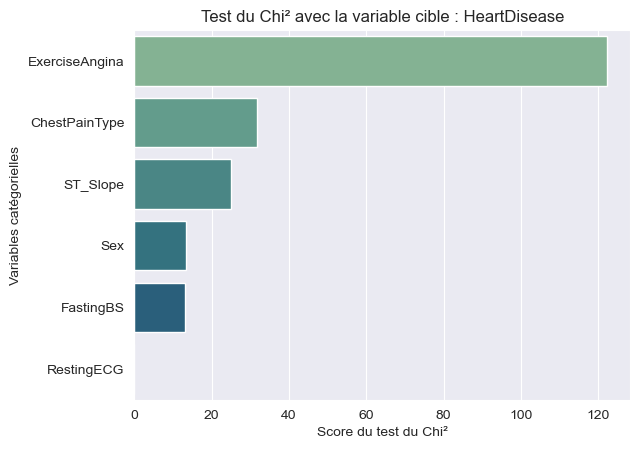

In [205]:
chi2_df, selected_cat = corr_Categorie_Col(heart_df_cleaned, categorical_cols, target_select,p_threshold=0.01)

Avec un filtrage à 0.3 pour les variables quantitatives et 0.01 pour les variables catégorielles, on obtient les variables suivantes pour le dataFrame que nous allons utiliser pour relancer K-means clustering :
- Variables quantitatives sélectionnées : ['Oldpeak', 'MaxHR']
- Variables catégorielles sélectionnées : ['ExerciseAngina', 'ChestPainType', 'ST_Slope', 'Sex', 'FastingBS']


#### Recréation du DataFrame avec les variables sélectionnées et relance de K-means clustering

In [206]:
final_heart_df = heart_df_Select[['Oldpeak', 'MaxHR', 'ExerciseAngina', 'ChestPainType', 'ST_Slope', 'Sex', 'FastingBS']]
final_heart_df

,Oldpeak,MaxHR,ExerciseAngina,ChestPainType,ST_Slope,Sex,FastingBS
0,0.0,172,N,ATA,Up,M,0
1,1.0,156,N,NAP,Flat,F,0
2,0.0,98,N,ATA,Up,M,0
3,1.5,108,Y,ASY,Flat,F,0
4,0.0,122,N,NAP,Up,M,0
...,...,...,...,...,...,...,...
912,0.2,123,Y,ASY,Flat,F,0
913,1.2,132,N,TA,Flat,M,0
915,1.2,115,Y,ASY,Flat,M,0
916,0.0,174,N,ATA,Flat,F,0


In [207]:
# Encodage des variables catégorielles et normalisation des variables quantitatives
final_heart_df_encoded = pd.get_dummies(final_heart_df, drop_first=True)

standarScal = StandardScaler()
final_heart_df_encoded[['Oldpeak', 'MaxHR']] = standarScal.fit_transform(final_heart_df_encoded[['Oldpeak', 'MaxHR']])
final_heart_df_encoded

,Oldpeak,MaxHR,FastingBS,ExerciseAngina_Y,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,Sex_M
0,-0.840498,1.351347,0,False,True,False,False,False,True,True
1,0.286868,0.653196,0,False,False,True,False,True,False,False
2,-0.840498,-1.877600,0,False,True,False,False,False,True,True
3,0.850551,-1.441256,0,True,False,False,False,True,False,False
4,-0.840498,-0.830374,0,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
912,-0.615024,-0.786740,0,True,False,False,False,True,False,False
913,0.512341,-0.394030,0,False,False,False,True,True,False,True
915,0.512341,-1.135815,0,True,False,False,False,True,False,True
916,-0.840498,1.438616,0,False,True,False,False,True,False,False


In [208]:
# Lancement de K-means clustering sur les données avec sélection de variables
x_final = final_heart_df_encoded.values
res_final = multipleKMeans(x_final, klist)

 ----- Évaluation du modèle K-Means pour différentes valeurs de k -----
k     | Inertia      | Silhouette   | Calinski-H      | Davies-Bouldin 
----------------------------------------------------------------------
2     | 1391.53      | 0.326        | 350.60          | 1.257          
3     | 1161.89      | 0.246        | 271.38          | 1.476          
4     | 1049.25      | 0.207        | 222.35          | 1.533          
5     | 941.57       | 0.216        | 203.35          | 1.462          
6     | 875.24       | 0.210        | 184.15          | 1.465          
7     | 825.55       | 0.198        | 168.67          | 1.540          
8     | 798.99       | 0.179        | 152.08          | 1.628          
9     | 756.13       | 0.187        | 144.77          | 1.554          
10    | 734.64       | 0.192        | 134.25          | 1.622          
----------------------------------------------------------------------



 Calcul de l'inertie pour différentes valeurs de k

k     | Inertia     
--------------------
2     | 1391.53     
3     | 1161.89     
4     | 1049.25     
5     | 941.57      
6     | 875.24      
7     | 825.55      
8     | 798.99      
9     | 756.13      
10    | 734.64      
--------------------


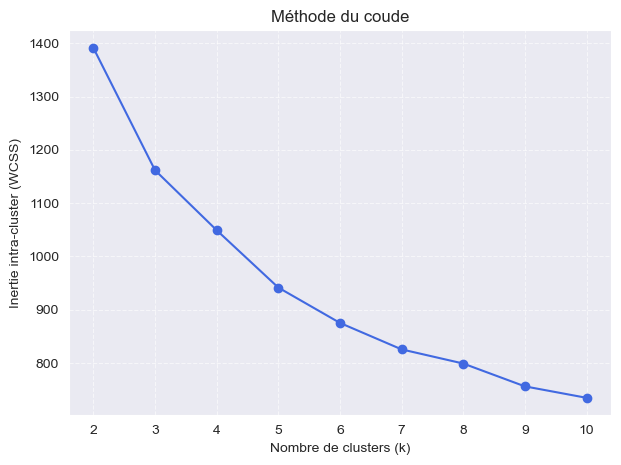

In [209]:
elbow_final = elbow_method(x_final, klist)

On croise les différents métriques et on obtient les résultats suivants :

| **Métrique**                | **Valeur optimale observée**                         | **Indication sur k optimal** |
| --------------------------- | ---------------------------------------------------- | ------------------------- |
| **Inertia**                 | Forte baisse jusqu’à **k ≈ 3–4**, puis stabilisation |  **Coude vers 3–4**       |
| **Silhouette Score**        | Maximum à **k = 2 (0.326)**                          |  **k = 2**                |
| **Calinski–Harabasz Index** | Maximum à **k = 2 (350.6)**                          |  **k = 2**                |
| **Davies–Bouldin Index**    | Minimum à **k = 2 (1.257)**                          |  **k = 2**                |

On observe de nouveau que k=2 est la meilleure valeur pour le clustering, ce qui est cohérent avec les résultats précédents. Le score silhouette est légèrement amélioré (0.326 vs 0.233 avant sélection de variables), indiquant une meilleure séparation entre les clusters. La sélection de variables a permis de se concentrer sur les caractéristiques les plus discriminantes, améliorant ainsi la qualité du clustering.



In [210]:
kmeanFinal = KMeans(n_clusters=2, random_state=42)
kmeanFinal.fit(x_final)
final_heart_df_encoded['Cluster'] = kmeanFinal.labels_

In [211]:
# Réduction de dimensionnalité avec PCA pour visualisation en 2D
pca_final = PCA(n_components=2, random_state=42)
X_pca_final = pca_final.fit_transform(final_heart_df_encoded.drop("Cluster",axis=1))

# on transforme de nouveau en DataFrame pour faciliter la manipulation et on rajoute les labels de clusters
df_pca_final = pd.DataFrame(X_pca_final, columns=['PC1', 'PC2'])
df_pca_final['Cluster'] = final_heart_df_encoded['Cluster'].reset_index(drop=True)
df_pca_final['HeartDisease'] = target_select.reset_index(drop=True)
df_pca_final

,PC1,PC2,Cluster,HeartDisease
0,-1.758972,0.415013,0,0
1,-0.075942,0.782778,0,1
2,0.127391,-2.100641,0,0
3,1.823155,-0.495429,1,1
4,-0.418782,-1.230483,0,0
...,...,...,...,...
623,0.495445,-0.879529,1,1
624,0.816021,0.118274,1,1
625,1.498225,-0.453999,1,1
626,-1.327592,0.652709,0,1


In [213]:
fig = px.scatter(
    df_pca_final,
    x="PC1", y="PC2",
    color=df_pca_final["Cluster"].astype(str),
    title="Visualisation des clusters K-Means en 2D (PCA)",
    template="plotly_dark",
    hover_data=["HeartDisease"],  # Affiché au survol
    symbol=['circle' if hd == 0 else 'x' for hd in df_pca_final['HeartDisease']],
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    height=900,
    width=1300,
    title_font_size=20
)
fig.show()

La visualisation 2D issue de la PCA met en évidence deux regroupements distincts détectés par K-Means, traduisant une structure binaire au sein des données. Cependant, la correspondance avec la variable cible (HeartDisease) reste faible : les individus malades et non malades sont répartis dans les deux clusters. Cela suggère que K-Means a principalement capturé des différences physiologiques générales, plutôt qu’une séparation explicite selon l’état de santé. Cette observation peut nous orienter donc sur les limites du clusturing avec la méthode Kmeans. L'hypothèse selon laquelle mon raisonnement et ma méthodologie sont incorrects n'est pas à exclure. D'autres approches de clustering, telles que DBSCAN ou les modèles de mélange gaussien, pourraient potentiellement mieux capturer la complexité des données et révéler des structures plus pertinentes en lien avec la maladie cardiaque. Nous pourrons voir cela dans les autres parties du projet.